# HOMOMORPHIC
## Alessio Proietti, Scienze Computazionali, Dip. di Matematica e Fisica Roma TRE

### tesina del corso di Cybersecurity - Anno Accademico 2022-2023 - Laurea magistrale in Ing. Inf.
<img alt="Logo RomaTRE" src="https://www.uniroma3.it/wp-content/uploads/2017/02/logo-uniroma3.jpg" width=30% height=30% title="Logo Roma TRE"/>
<img alt="Clouds" src="./cloud.jpg" width=30% height=30% title="Clouds"/>

*Abstract*

La ricerca sulla Crittografia Omomorfa si propone di sviluppare primitive in grado di eseguire funzioni su dati cifrati e restituire un output cifrato. Le prospettive di questo campo sono ambiziose e le applicazioni sono molteplici, tuttavia le sfide e le limitazioni delle varie proposte di schemi omomorfici descritte nella letteratura sono ben note e rigorose. Nel corso degli anni sono state introdotte diverse generazioni di schemi, ciascuna promettendo di risolvere i problemi della generazione precedente in termini di efficienza e di profondità dei circuiti risolvibili in modo omomorfico. Tuttavia lo sforzo ha contribuito a chiarire alcuni presupposti teorici che rendono possibili gli schemi proposti, essendo tutte le soluzioni di successo basate su generalizzazioni o varianti dello stessi problema matematico, che è il problema *GLWE*.

Le implementazioni di questi schemi non mancano, tuttavia spesso presentano incongruenze o incompletezze nonostante i notevoli sforzi di standardizzazione (vedi [12]). Questo studio si concentra sul problema dell'esponenziazione modulare, in previsione di future applicazioni nella ricerca di protocolli per la firma digitale distribuita. Sono state valutate l'usabilità e i limiti di diverse librerie note che implementano schemi appartenenti a generazioni diverse, ma che fondamentalmente operano tutte su numeri interi.

**Sommario**
1. RSA Omomorfo
2. TFHE e precursori
3. Esperimenti in TFHE con lib TFHE-rs 
4. Esperimenti in BGV con lib SEAL-python
5. Lavoro Futuro 
6. Conclusione
7. Appendice
8. Bibliografia


## 1. RSA Omomorfo 

RSA (Rivest–Shamir–Adleman) è un crittosistema a chiave asimmetrica descritto pubblicamente nel 1977 ma noto all'agenzia di intelligence britannica *GCHQ* dal 1973. È uno dei sistemi più diffusi in assoluto, le sue chiavi sono tipicamente a 2048 e 4096 bit e una delle sue applicazioni più note è nei certificati SSL nella sua forma di algoritmo di firma digitale. 

La sicurezza di RSA, ancorché mai dimostrata, si basa sulla difficoltà della fattorizzazione di interi che, nella sua versione decisionale, appartiene alla classe *NP* mentre non è opinione diffusa che sia anche *NP-complete* (non sono note dimostrazioni di questo fatto).

L' operazione fondamentale dell' unico round di RSA è l' esponenziale modulare. È una operazione pesante per client limitati computazionalmente e pertanto potrebbe essere esternalizzata (e quindi la firma stessa di un messaggio) ad un provider di risorse computazionali remote. È essenziale che l' esponente non sia pubblico perché con esso un avversario può firmare qualsiasi messaggio desideri; pertanto, mentre è assolutamente necessario che sia cifrato l' esponente, questo non è richiesto per il messaggio stesso ma possiamo in una prima analisi richiedere che siano entrambi cifrati. Un algoritmo molto efficiente per l' esponenziazione in generale è l' algoritmo *square and multiply* (e varianti, tipo *Montgomery Powering Ladder*) e nel seguito analizzeremo solo questo.



## 2. TFHE e Precursori
Secondo Wikipedia [2] è possible rintracciare dei precursori alle generazioni, per così dire, canoniche di FHE (*Fully Homomorphic Encryption*) in una serie di crittosistemi classsici che esibiscono proprietà parziali di omomorficità in quanto il problema è ben noto sin dal 1978 [3]. È bene tuttavia considerare come punto di svolta nel campo il grande lavoro sui reticoli algebrici di Craig Gentry pubblicato nel 2009 [4]; egli introdusse una tecnica detta di *bootstrap* con la quale è possibile trasformare alcuni schemi (tipo il suo) che possono valutare solo polinomi di grado basso in schemi pienamente omomorfi che possono eseguire operazioni arbitrarie. 

Nel suo schema ogni operazione polinomiale sul cifrato introduce nel cifrato stesso rumore che alla fine (cioè dopo un numero di operazioni omomorfiche) sovrasta completamente il segnale nel cifrato e il messaggio originale viene perso. Il *boostrap* è in grado di rimuovere il rumore durante il calcolo ma è una operazione inefficiente e rende impraticabile l' operazione. 

Nella seconda generazione di schemi omomorfi (e ci concentriamo solo su quelli basati sul problema RLWE/LWE) spiccano BGV e BFV, i quali lavorano sui interi ed esibiscono lenta crescita del rumore la quale può essere ulteriormente gestita con l' approccio a livelli (infatti si dice che sono *levelled*). Sono noti tentativi matematici di *bootstrap* per BGV (ed BFV) [9][10] e, usando le library più di successo, si sono avanzate implementazioni ma quest' ultime non sono mai state rese pubbliche. Nel seguito ci concentreremo su BGV lavorando con un *wrapper* in python3 alla nota lib MS SEAL.


Nella terza generazione il lavoro di GSW (Craig Gentry, Amit Sahai, and Brent Waters) ha introdotto nuove idee che hanno portato al fondamentale avanzamento in FHEW e TFHE. Nella quarta generazione è stato introdotto il calcolo sui reali con CKKS ed è lo schema prediletto e al momento migliore per valutare approssimazioni polinomiali.

Ritornando alla terza generazione, TFHE (cioè DM/CGGI) è in grado di simulare NAND e la propria decifratura e questo lo rende universale per il calcolo di qualsiasi circuito in maniera cifrata a meno di *bootstrap* che tralaltro in questo cifrario è estremamente efficiente ed efficace nonché programmabile (*programmable bootstrap* consente di calcolare una funzione sul cifrario mentre si riduce il noise). TFHE (e la sua genesi da LWE) è perfettamente illustrato in una serie di blog post pubblicati da Zama (https://www.zama.ai/) sul loro sito [1].  

TFHE-rs [11] è una libreria avanzata scritta in Rust, pubblicata da Zama e che permette di calcolare qualsiasi funzione (ci sono dei caveat) su interi e su bit. Useremo nel prossimo paragrafo TFHE-rs per provare a calcolare l' esponenziale modulare.

## 3. Esperimenti in TFHE con TFHE-rs lib 

In [ ]:
// p = 13
// q = 17
// n = 17 * 13 = 221 
// lcm(p-1, q-1) = 48
// e = 5
// d = 29
// de = 1 mod 48

In [2]:
:dep tfhe = { version = "0.2.4", features = [ "boolean", "shortint", "integer", "x86_64-unix" ] }

In [3]:
use tfhe::{ConfigBuilder, generate_keys, set_server_key, FheUint8};
use tfhe::prelude::*;
use std::u64;
use std::time::{Duration, Instant};

In [ ]:
fn square_and_multiply(base:u64, exponent :u64, modulus: u64) -> u64 {

    if exponent == 0 {
        return base;
    }

    let mut z = 1;
    let mut b = base % modulus;
    let mut e = exponent;

    for _i in 0..exponent-1 {
        if e %2 == 1 {
            z = (z*b) % modulus;
        }

        e=e >> 1;
        b = (b*b)% modulus;
    }

    return z;
}

In [25]:
fn main() {
    let config = ConfigBuilder::all_disabled()
        .enable_default_uint8()
        .build();

    let start = Instant::now();

    // Client-side
    let (client_key, server_key) = generate_keys(config);
    
    let key_generation_time: Duration = start.elapsed();


    let clear_e = 29u8; // esponente segreto aka chiave
    let m = 42u8; // il messaggio da firmare, è in CHIARO!
    let n = 221u8; // il modulo, fa parte della chiave pubblica.

    // cifro la chiave
    let e = FheUint8::encrypt(clear_e, &client_key);
    

    let mod_pow = |value: u64| {
        square_and_multiply(m.into(), value, n.into()) as u64
    };

    //Server-side
    set_server_key(server_key);
    
    // map applica TFHE programmable bootstrapping.
    // Call it magic!
    let result = e.map(mod_pow);
    let sqmul_time: Duration = start.elapsed();


    //Client-side
    let decrypted_result: u8 = result.decrypt(&client_key);

    print!("key generation: {:?}, square multiply/programmable bootstrapping: {:?}", key_generation_time, sqmul_time-key_generation_time);
    
    //42^29 mod 221 = 9 mod 221
    assert_eq!(decrypted_result, 9);

In [26]:
main();
//key generation: 216.999534608s, square multiply/programmable bootstrapping: 269.832381243s

Error: Subprocess terminated with status: signal: 9 (SIGKILL)

## 4. Esperimenti in BGV con SEAL-python lib

**Algoritmo Square&Multiply con vettori:**

$M \ \leftarrow \ messaggio \\ e \ \leftarrow \ LSB( (esponente)_{2} ) \\ plaintext \ \leftarrow 1 + (M-1)\times e$ 
$\\ ciphertext \ \leftarrow \ BGVEncrypt(plaintext)$
$\\ z \ \leftarrow \ BGVEncrypt([1,...,1])$

<br>

per $i$ in $[0,lunghezza(plaintext))$ **esegui**:
    $\\ \ \ \ \ z \ \leftarrow \ z^2$
    $\\ \ \ \ \ z \ \leftarrow \ z \times ciphertext $
    $\\ \ \ \ \ ciphertext \ \leftarrow \ RuotaVersoDestra(ciphertext)$

**restituisci** $z[lunghezza(plaintext)-1]$


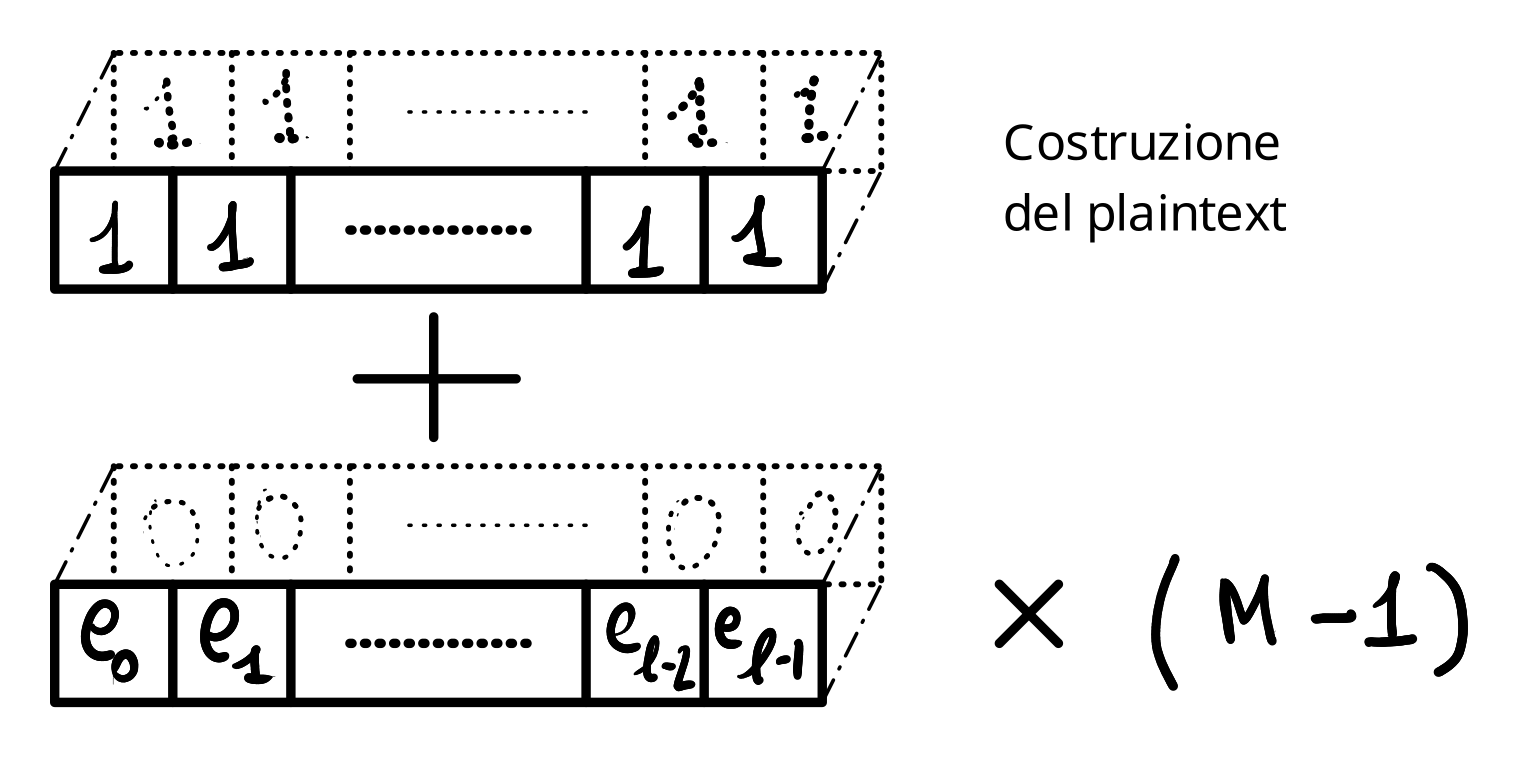

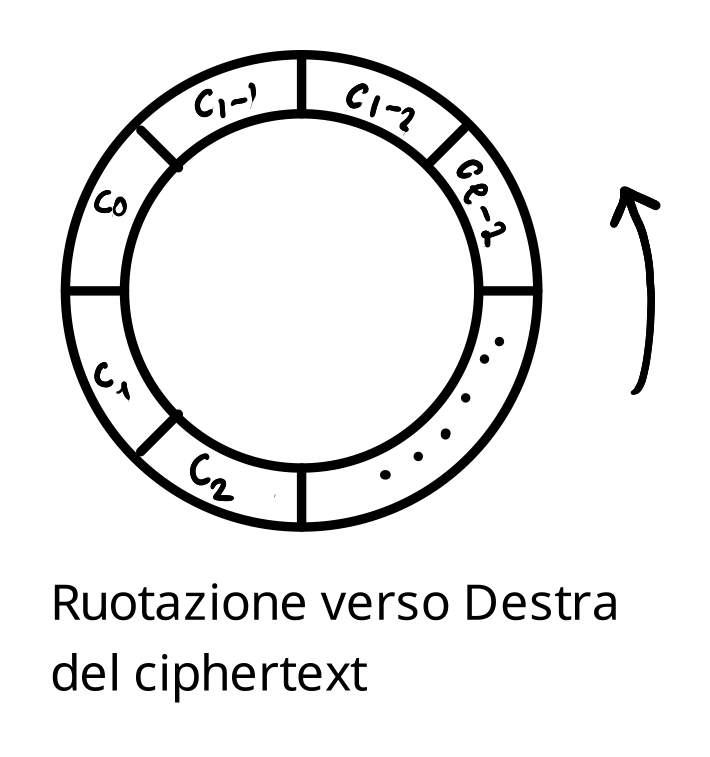

In [1]:
from seal import *

## 5. Lavoro Futuro 
Non sono state esaminate le performance e l' usabilità o l' API di HElib [5] che è una lib scritta in C++ e che implementa CKKS (*bootstrapped*) e BGV, inoltre non è noto all' autore su HElib offra BGV con *bootstrap*.
Un' altra library molto promettente, scritta in GO, è lattigo. Lattigo, che fu inzialmente sviluppata da EPFL Laboratory for Data Security e il cui sviluppo è successivamente passato di mano a https://tuneinsight.com/, offre *multiparty homomorphic encryption* basato su reticoli e in particolare implementa CKKS (cioè aritmetica sui reali) e BGV/BFV. 

Di fondamentale importanza è Openfhe [8] che ha come obbiettivo quello di implementare i futuri standard di crittografia omomorfica post-quantum, sarebbe interessante esplorarne le applicazioni per la firma distribuita.


## 6. Conclusione
Poiché TFHE-rs supporta il tipo booleano allora sarebbe buono implementare hash etc...

## 7. Appendice

## 8. Bibliografia
1. Ilaria Chillotti. TFHE Deep Dive. https://www.zama.ai/post/tfhe-deep-dive-part-1
2. Various authors. Homomorphic encryption. https://en.wikipedia.org/wiki/Homomorphic_encryption
3. R. L. Rivest, L. Adleman, and M. L. Dertouzos. On data banks and privacy homomorphisms. In Foundations of Secure Computation, 1978.
4. Craig Gentry. Fully Homomorphic Encryption Using Ideal Lattices. In the 41st ACM Symposium on Theory of Computing (STOC), 2009.
5. HElib. https://homenc.github.io/HElib/
6. MS SEAL. https://www.microsoft.com/en-us/research/project/microsoft-seal/
7. Lattigo. https://github.com/tuneinsight/lattigo
8. Openfhe. https://www.openfhe.org/
9. Geelen, R., Vercauteren, F. Bootstrapping for BGV and BFV Revisited. J Cryptol 36, 12 (2023). https://doi.org/10.1007/s00145-023-09454-6
10. Ahmad Al Badawi, & Yuriy Polyakov. (2023). Demystifying Bootstrapping in Fully Homomorphic Encryption.https://eprint.iacr.org/2023/149 .
11. TFHE-rs. https://github.com/zama-ai/tfhe-rs
12. https://homomorphicencryption.org/
